# Predictive Methods Project :

<ul>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
  <li></li>
</ul>

Rendu :<br>
- Notebook =>  <br>
- Rapport =>  <br>
- Brouillon, plan, idées & liens utiles =>  <br>

## 0°/ Introduction :

This part will be filled when we find a correct source of data and all agreed on the topic.

## 1°/ Set up :

### 1.1°/ Pip install & Import :

In [33]:
# Some libraries may need to be installed beforehand, add any !pip install here
#!pip install pandas
#!pip install geopandas
#!pip install tqdm

In [1]:
import pandas as pd
import numpy as np
import warnings

# Useful to show loop progress
from tqdm import tqdm

# Turn off warning
warnings.filterwarnings('ignore')

### 1.2°/ Import datasets

In [2]:
# =============================================================
# == I set up the Corse zone (2A, 2B) as number (201, 202)   ==
# == Be mindful of this particularity throughout the project ==
# =============================================================

dic_test = {
    '01' : "Ain"
}
dic_test_2 = {
    '01' : "Ain",
    '03' : "Allier", 
    '04' : "Alpes-de-Haute-Provence",
    '06' : "Alpes-Maritimes", 
    '07' : "Ardèche",
    '13' : "Bouches-du-Rhône",
    '15' : "Cantal",
    '26' : "Drôme",
    '38' : "Isère",
    '42' : "Loire", 
    '43' : "Haute-Loire",
    '69' : "Rhône",
    '73' : "Savoie", 
    '74' : "Haute-Savoie",
    '83' : "Var", 
    '84' : "Vaucluse"
}

En_France_métropolitaine = {
    '01' : "Ain", 
    '02' : "Aisne", 
    '03' : "Allier", 
    '04' : "Alpes-de-Haute-Provence", 
    '05' : "Hautes-Alpes", 
    '06' : "Alpes-Maritimes", 
    '07' : "Ardèche", 
    '08' : "Ardennes", 
    '09' : "Ariège", 
    '10' : "Aube", 
    '11' : "Aude", 
    '12' : "Aveyron", 
    '13' : "Bouches-du-Rhône", 
    '14' : "Calvados", 
    '15' : "Cantal", 
    '16' : "Charente", 
    '17' : "Charente-Maritime", 
    '18' : "Cher", 
    '19' : "Corrèze", 
    '201' : "Corse-du-Sud", 
    '202' : "Haute-Corse", 
    '21' : "Côte-d'Or", 
    '22' : "Côtes-d'Armor", 
    '23' : "Creuse", 
    '24' : "Dordogne", 
    '25' : "Doubs", 
    '26' : "Drôme", 
    '27' : "Eure", 
    '28' : "Eure-et-Loir", 
    '29' : "Finistère", 
    '30' : "Gard", 
    '31' : "Haute-Garonne", 
    '32' : "Gers", 
    '33' : "Gironde", 
    '34' : "Hérault", 
    '35' : "Ille-et-Vilaine", 
    '36' : "Indre", 
    '37' : "Indre-et-Loire", 
    '38' : "Isère", 
    '39' : "Jura", 
    '40' : "Landes", 
    '41' : "Loir-et-Cher", 
    '42' : "Loire", 
    '43' : "Haute-Loire", 
    '44' : "Loire-Atlantique", 
    '45' : "Loiret", 
    '46' : "Lot", 
    '47' : "Lot-et-Garonne", 
    '48' : "Lozère", 
    '49' : "Maine-et-Loire", 
    '50' : "Manche", 
    '51' : "Marne", 
    '52' : "Haute-Marne", 
    '53' : "Mayenne", 
    '54' : "Meurthe-et-Moselle", 
    '55' : "Meuse", 
    '56' : "Morbihan", 
    '57' : "Moselle", 
    '58' : "Nièvre", 
    '59' : "Nord", 
    '60' : "Oise", 
    '61' : "Orne", 
    '62' : "Pas-de-Calais", 
    '63' : "Puy-de-Dôme", 
    '64' : "Pyrénées-Atlantiques", 
    '65' : "Hautes-Pyrénées", 
    '66' : "Pyrénées-Orientales", 
    '67' : "Bas-Rhin", 
    '68' : "Haut-Rhin", 
    '69' : "Rhône", 
    '70' : "Haute-Saône", 
    '71' : "Saône-et-Loire", 
    '72' : "Sarthe", 
    '73' : "Savoie", 
    '74' : "Haute-Savoie", 
    '75' : "Paris", 
    '76' : "Seine-Maritime", 
    '77' : "Seine-et-Marne", 
    '78' : "Yvelines", 
    '79' : "Deux-Sèvres", 
    '80' : "Somme", 
    '81' : "Tarn", 
    '82' : "Tarn-et-Garonne", 
    '83' : "Var", 
    '84' : "Vaucluse", 
    '85' : "Vendée", 
    '86' : "Vienne", 
    '87' : "Haute-Vienne", 
    '88' : "Vosges", 
    '89' : "Yonne", 
    '90' : "Territoire_de_Belfort", 
    '91' : "Essonne", 
    '92' : "Hauts-de-Seine", 
    '93' : "Seine-Saint-Denis", 
    '94' : "Val-de-Marne", 
    '95' : "Val-d'Oise"
}

Region = {
    "Auvergne-Rhône-Alpes": [1, 3, 7, 15, 26, 38, 42, 43, 69, 73, 74],
    "Bourgogne-Franche-Comté": [21, 25, 39, 58, 70, 71, 89, 90],
    "Bretagne": [22, 29, 35, 56],
    "Centre-Val de Loire": [18, 28, 36, 37, 41, 45],
    "Grand Est": [8, 10, 51, 52, 54, 55, 57, 67, 68, 88],
    "Hauts-de-France": [2, 59, 60, 62, 80],
    "Île-de-France": [75, 77, 78, 91, 92, 93, 94, 95],
    "Normandie": [14, 27, 50, 61, 76],
    "Nouvelle-Aquitaine": [16, 17, 19, 23, 24, 33, 40, 47, 64, 79, 86, 87],
    "Occitanie": [9, 11, 12, 30, 31, 32, 34, 46, 48, 65, 66, 81, 82],
    "Pays de la Loire": [44, 49, 53, 72, 85],
    "Provence-Alpes-Côte d'Azur": [4, 6, 13, 83, 84],
}

d_rtt = {'NUM_POSTE' : 'string',
'NOM_USUEL' : 'string',
'LAT' : 'string',
'LON' : 'string',
'ALTI' : 'string',
'AAAAMMJJ' : 'string',
'RR' : 'string',
'TM' : 'string',
'TN50' : 'string',
'FFM' : 'string',
'DRR' : 'string',
}

d_autre_para = {'NUM_POSTE' : 'string',
'NOM_USUEL' : 'string',
'LAT' : 'string',
'LON' : 'string',
'ALTI' : 'string',
'AAAAMMJJ' : 'string',
'DHUMEC' : 'string',
'INST' : 'float',
'UV' : 'float',
'UM' : 'float',
'NEIG' : 'int',
'BROU' : 'int',
'ORAG' : 'int',
'GRESIL' : 'int',
'GRELE' : 'int',
'ROSEE' : 'int',
'VERGLAS' : 'int',
'SOLNEIGE' : 'int',
'GELEE' : 'int',
'FUMEE' : 'int',
'BRUME' : 'int',
'ECLAIR' : 'int'
}

In [3]:
def base_data_cleaning(df, start_year, end_year):
    """
    This function does 2 things :
    - By manually setting it, keep only data between 2 given year
    - It allow to drop all rows with NaN value that should have contained mandatory information
    """

    # I'm a baka
    df['AAAAMMJJ'] = df['AAAAMMJJ'].astype('str')
    df['NUM_POSTE'] = df['NUM_POSTE'].astype('str')

    # Drop rows without id
    df = df.dropna(subset = ['NUM_POSTE', 'AAAAMMJJ'])

    # ===========================================
    # == Only keep Data between the set period ==
    # ===========================================
    df = df[df['AAAAMMJJ'].str[:4].astype('int').between(start_year, end_year)]

    return df

def modify_columns(df, key, value):
    """
    Extract the feature of the date columns
    Also assign the department number and name to the extracted data
    """
    #df = df.drop(Col_to_drop, axis = 1)
    #df = df.drop(Q_col_to_drop, axis = 1)

    df['Year'] = df['AAAAMMJJ'].str[:4]
    df['Month'] = df['AAAAMMJJ'].str[4:6]
    df['Day'] = df['AAAAMMJJ'].str[-2:]
    
    df['Dept_numb'] = key
    df['Dept_name'] = value

    return df

def webo_scrappo_el_dataframo(start_y, end_y):
    """
    Extract the weather data from all department of the metropolitan France on a given period of time
    This function use the following link :
    https://www.data.gouv.fr/datasets/donnees-climatologiques-de-base-quotidiennes
    To extract from data.gouv for each department all 4 related datasets.
    Then proceed by merging and concatenating all of them
    """
    df_metropo = pd.DataFrame()
    dept_error = []

    # Data source : https://www.data.gouv.fr/datasets/donnees-climatologiques-de-base-quotidiennes

    # The download link is such as :
    # url_base + "department number" + url_end{RTT_1950, autre_1950, RTT_2025, autre_2025}
    # We have 95 department in the metropolitan area : 95 'Dept_number'
    # All department have a dataset for RTT & Other_feature, then those cover both the 1950-2023 period and 2024-2025 period : 4 datasets per department
    # => around 95*4 = 380 url

    url_base = "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_"
    
    url_end_RTT_1950 = "_previous-1950-2023_RR-T-Vent.csv.gz"
    url_end_autre_1950 = "_previous-1950-2023_autres-parametres.csv.gz"
    url_end_RTT_2025 = "_latest-2024-2025_RR-T-Vent.csv.gz"
    url_end_autre_2025 = "_latest-2024-2025_autres-parametres.csv.gz"

    for key, value in tqdm(dic_test_2.items(), desc="Downloading depts"):

        try :

            url = url_base + key
            df_temp_RTT_1950 = pd.read_csv(url + url_end_RTT_1950, sep = ';', usecols = d_rtt.keys(), compression = 'gzip')
            df_temp_autre_1950 = pd.read_csv(url + url_end_autre_1950, sep = ';', usecols = d_autre_para.keys(), compression = 'gzip')
            df_temp_RTT_2025 = pd.read_csv(url + url_end_RTT_2025, sep = ';', usecols = d_rtt.keys(), compression = 'gzip')
            df_temp_autre_2025 = pd.read_csv(url + url_end_autre_2025, sep = ';', usecols = d_autre_para.keys(), compression = 'gzip')

            df_temp_RTT_1950 = base_data_cleaning(df_temp_RTT_1950, start_y, end_y)
            df_temp_autre_1950 = base_data_cleaning(df_temp_autre_1950, start_y, end_y)
            df_temp_RTT_2025 = base_data_cleaning(df_temp_RTT_2025, start_y, end_y)
            df_temp_autre_2025 = base_data_cleaning(df_temp_autre_2025, start_y, end_y)

            df_temp_1950 = pd.merge(df_temp_RTT_1950, df_temp_autre_1950, on = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'], how = "left")
            df_temp_2025 = pd.merge(df_temp_RTT_2025, df_temp_autre_2025, on = ['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ'], how = "left")

            df_temp = pd.concat([df_temp_1950, df_temp_2025])
            
            df_temp = modify_columns(df_temp, key, value)

            df_metropo = pd.concat([df_metropo, df_temp])
            
            #print(key)
        
        except:
            dept_error.append(key)

        # This print the progress
        # tqdm.write(f"➡ Dept: {key}")

    print(dept_error)

    return df_metropo

In [4]:
df = webo_scrappo_el_dataframo(2015, 2025)
df.shape

[]


(2659824, 32)

### 1.3°/ Energy consumption dataset :

List of different dataset I could use from the <a href = "https://www.data.gouv.fr/organizations/open-data-reseaux-energies-1/">ODRE</a>
<ul>
    <li>https://www.data.gouv.fr/datasets/consommation-departementale-annuelle/</li>
    <li>https://www.data.gouv.fr/datasets/consommation-annuelle-brute-regionale/</li>
</ul>

In [9]:
df_elec = pd.read_csv("https://www.data.gouv.fr/api/1/datasets/r/bac47269-7f53-4d61-804b-ca7fbf328a43", sep = ';')
df_elec.head()

,Année,Code département,Libellé département,Code région,Libellé région,Consommation agriculture (MWh),Consommation industrie (MWh),Consommation résidentiel (MWh),Consommation tertiaire (MWh),Consommation autre (MWh),...,Opérateur électricité,Consommation gaz agriculture (MWh),Consommation gaz industrie (MWh),Consommation gaz résidentiel (MWh),Consommation gaz tertiaire (MWh),Consommation gaz autre (MWh),Consommation gaz totale (MWh),Opérateur gaz,Géo-shape département,Géo-point département
0,2012,09,Ariège,76,Occitanie,3698.88,255085.68,536606.68,153944.85,5001.57,...,Régie municipale d’électricité de l’Hospitalet...,0.0,0.00,0.0,0.0,0.0,0.00,(Aucun),"{""coordinates"": [[[[1.688430901, 43.273549365]...","42.921006419, 1.503629709"
1,2012,10,Aube,44,Grand Est,32844.98,3075179.26,2318302.29,788109.56,100068.08,...,"RTE,Enedis",266.0,2423717.49,1288214.0,398694.0,98313.0,4209204.49,"GRDF,NaTran","{""coordinates"": [[[[3.414735504, 48.390187765]...","48.304654356, 4.161442172"
2,2012,38,Isère,84,Auvergne-Rhône-Alpes,21283.76,10160342.25,6016247.46,2670237.14,69112.38,...,"Groupement Elise - Régie d’Allemont,Groupement...",982.0,6200724.72,2331149.0,705008.0,66499.0,9304362.72,"Groupement Elise - Régie de Séchilienne,Groupe...","{""coordinates"": [[[[5.623742906, 45.613268446]...","45.263929469, 5.574198358"
3,2012,84,Vaucluse,93,Provence-Alpes-Côte d'Azur,81283.80,1971774.19,3193136.50,1380965.24,13955.71,...,"RTE,Enedis",55613.0,1257016.70,999711.0,397862.0,13222.0,2723424.70,"GRDF,NaTran","{""coordinates"": [[[[4.895360507, 44.338170773]...","44.00712076, 5.177303703"
4,2012,88,Vosges,44,Grand Est,7767.83,4272027.67,2495350.76,789574.08,122137.54,...,"RTE,Enedis",3562.0,2153901.74,1247719.0,384005.0,100367.0,3889554.74,"GRDF,NaTran","{""coordinates"": [[[[5.470068246, 48.420895401]...","48.196289956, 6.380129159"


### 1.4°/ Visualization set up :

In [41]:
# If you're working on an anaconda environment, do the following :
# *Open anaconda prompt terminal* (NOT ANOTHER ONE, THIS ONE ESPECIALLY)
# conda create -n "name_of_your_environment" python=3.14
# conda activate name_of_your_environment
# conda install -c conda-forge geopandas
# pip install of conda install on any other terminal will end in a error with the "pyogrio" module. Why ? The hell I don't know.

# https://www.data.gouv.fr/api/1/datasets/r/aacf9338-8944-4513-a7b9-4cd7c2db2fa9

import geopandas as gpd
import matplotlib as plt

In [42]:
# Non metropolitan France + Corsia
reg_useless = ['01', '02', '03', '04', '06', '94']

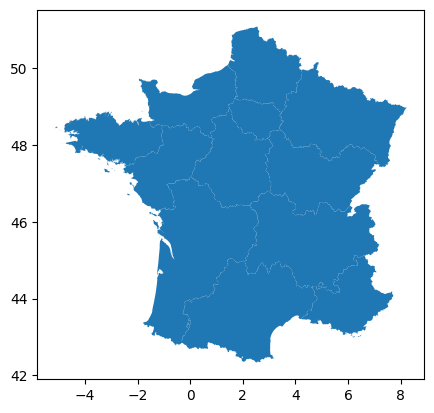

In [43]:
gdf = gpd.read_file('datasets/regions-20180101.shp')
gdf = gdf[~gdf['code_insee'].isin(reg_useless)]
gdf.plot() ;

## 2°/ Pre-processing :

### 2.0°/ Merge datasets (optional)

### 2.1 : Data cleaning :

In [ ]:
tt = ['ORAG',
'GRESIL',
'GRELE',
'ROSEE',
'VERGLAS',
'SOLNEIGE',
'GELEE',
'FUMEE',
'BRUME',
'ECLAIR']

for col in tt:
    print(df[col].value_counts())

ORAG
1.0    337
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
GRELE
1.0    20
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
VERGLAS
0.0    990
1.0    191
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
GELEE
0.0    1449
1.0      20
Name: count, dtype: int64
FUMEE
0.0    2091
Name: count, dtype: int64
BRUME
0.0    1610
1.0     493
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


In [ ]:
df.isna().sum()

NUM_POSTE        0
NOM_USUEL        0
LAT              0
LON              0
ALTI             0
AAAAMMJJ         0
RR            2125
TM           11158
TN50         40726
FFM          30882
DRR          40845
DHUMEC       42872
INST         35165
UV           42872
UM           28734
NEIG         40492
BROU         40461
ORAG         42535
GRESIL       42872
GRELE        42852
ROSEE        42872
VERGLAS      41691
SOLNEIGE     42872
GELEE        41403
FUMEE        40781
BRUME        40769
ECLAIR       42872
Year             0
Month            0
Day              0
Dept_numb        0
Dept_name        0
dtype: int64

In [49]:
# Create a bar chart showing the percentage of missing values over time with the number of stations in activity each year
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = (df['TM'].groupby(df['Year'])
                  .apply(lambda x: round(x.isnull()
                         .mean() * 100, 2)))

# Get the number of stations in activity each year
stations_in_activity = df['NUM_POSTE'].groupby(df['Year']).nunique()

# Create a dataframe to hold the missing values and stations in activity
missing_values_df = pd.DataFrame({'missing_values': missing_values, 'stations_in_activity': stations_in_activity})

missing_values_df

,missing_values,stations_in_activity
Year,,
2015,55.08,892
2016,54.03,877
2017,54.27,864
2018,51.95,834
2019,44.73,799
2020,39.86,781
2021,23.55,627
2022,15.10,581
2023,10.76,574


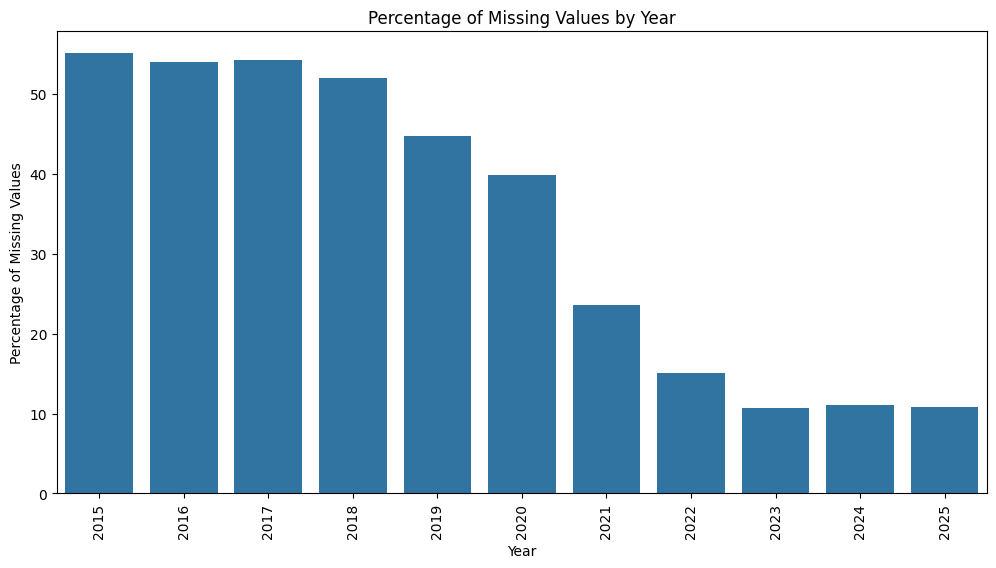

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Missing Values')
plt.show()

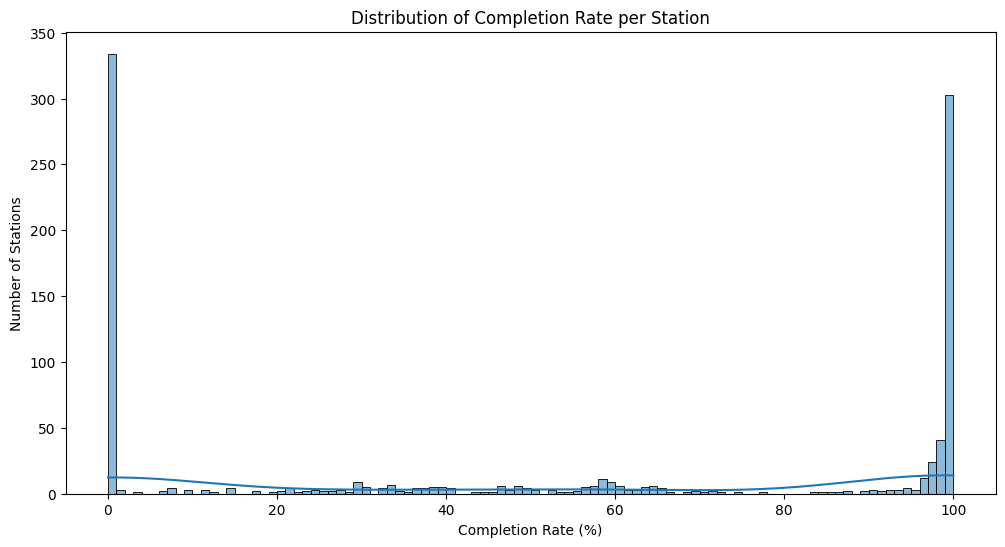

In [47]:
# Display the distribution of completion rate per station
completion_rate = df.groupby('NUM_POSTE')['TM'].apply(lambda x: x.notnull().mean() * 100)
plt.figure(figsize=(12, 6))
sns.histplot(completion_rate, bins=100, kde=True)
plt.title('Distribution of Completion Rate per Station')
plt.xlabel('Completion Rate (%)')
plt.ylabel('Number of Stations')
plt.show()

In [38]:
# For when the dataframe will be clean :
#df.to_csv("datasets/Weather_data_2010-2025.csv", index=False)

### 2.2°/ Explanatory data analysis :

## 3°/ Feature engineering (if needed) :

<ul>
  <li>List here the different feature extraction we can use depending on the model we will use. (Again this part may not be used so don't waste time on it)</li>
</ul>

## 4°/ Modeling :

We can do multiple model here to obtain different results so that we can debate over them later on.

### 4.1°/ 1st model :

### 4.i°/ i-ième model :

## 5°/ Models prediction & Metrics evaluation :